<a href="https://colab.research.google.com/github/Karthik-Aravapalli/CSE-572-Data-Mining/blob/main/DM_HW3_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163483 sha256=4f6be71a48bccd90d9ca8d6941c861508d750bf0e5fd749a85dc5706da365685
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from google.colab import files
uploaded = files.upload()

Saving ratings_small.csv to ratings_small.csv


In [4]:
# a
from surprise import Dataset, Reader
import os

# Path to the dataset file
file_path = os.path.expanduser('ratings_small.csv')

# Define the reader
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

# Load the dataset
data = Dataset.load_from_file(file_path, reader=reader)


In [5]:
# c
from surprise import SVD, KNNBasic
from surprise.model_selection import cross_validate
import numpy as np

# Define algorithms
algos = {
    "PMF": SVD(biased=False),
    "UserCF": KNNBasic(sim_options={'user_based': True}),
    "ItemCF": KNNBasic(sim_options={'user_based': False})
}

# Evaluate each algorithm
for name, algo in algos.items():
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    print(f"{name}: Average RMSE: {np.mean(cv_results['test_rmse'])}, Average MAE: {np.mean(cv_results['test_mae'])}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0135  1.0172  1.0095  1.0112  0.9949  1.0093  0.0076  
MAE (testset)     0.7829  0.7834  0.7787  0.7812  0.7703  0.7793  0.0048  
Fit time          1.34    1.63    2.16    1.51    1.35    1.60    0.30    
Test time         0.11    0.19    0.17    0.18    0.11    0.15    0.04    
PMF: Average RMSE: 1.0092712334997371, Average MAE: 0.7793210264385652
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
R

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

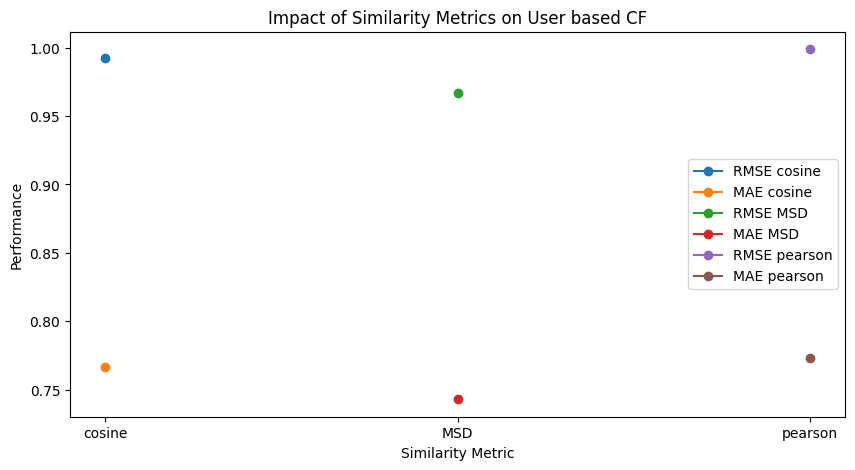

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

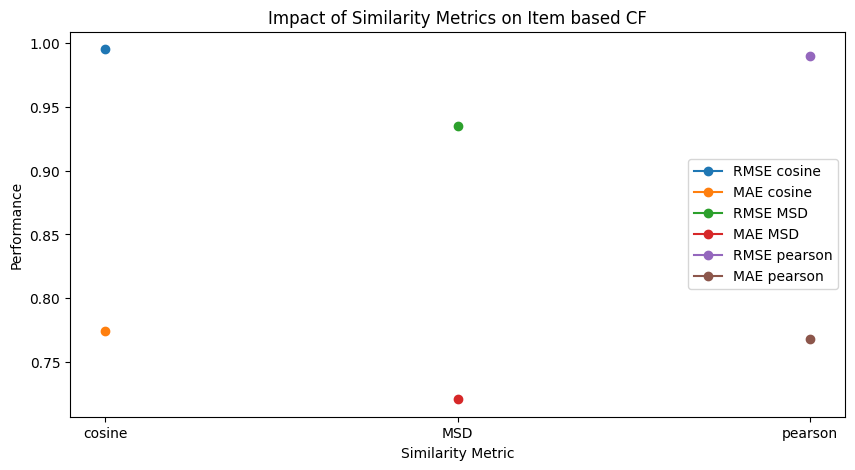

In [6]:
# e
import matplotlib.pyplot as plt

def plot_similarity_impact(algo_base, similarity_metrics, user_based):
    plt.figure(figsize=(10, 5))

    for sim_metric in similarity_metrics:
        algo = algo_base(sim_options={'name': sim_metric, 'user_based': user_based})
        results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
        plt.plot([sim_metric], [np.mean(results['test_rmse'])], label=f"RMSE {sim_metric}", marker='o')
        plt.plot([sim_metric], [np.mean(results['test_mae'])], label=f"MAE {sim_metric}", marker='o')

    plt.xlabel('Similarity Metric')
    plt.ylabel('Performance')
    plt.title('Impact of Similarity Metrics on ' + ('User' if user_based else 'Item') + ' based CF')
    plt.legend()
    plt.show()

# Examine for UserCF
plot_similarity_impact(KNNBasic, ['cosine', 'MSD', 'pearson'], user_based=True)

# Examine for ItemCF
plot_similarity_impact(KNNBasic, ['cosine', 'MSD', 'pearson'], user_based=False)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

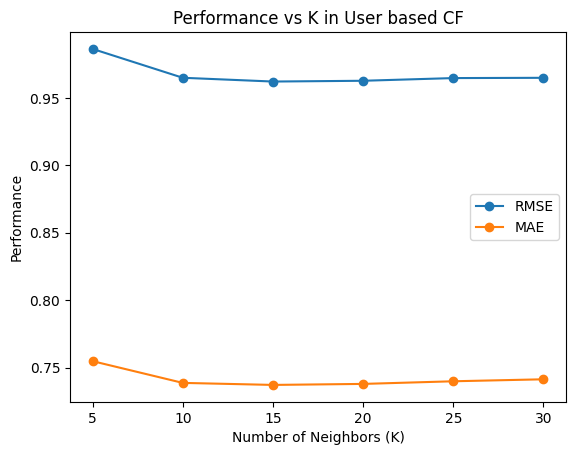

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

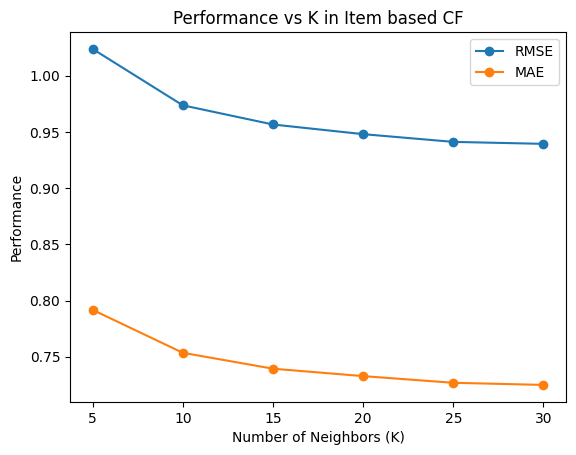

In [7]:
# f
def plot_neighbors_impact(algo_base, neighbors, user_based):
    rmses = []
    maes = []
    for k in neighbors:
        algo = algo_base(k=k, sim_options={'user_based': user_based})
        results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
        rmses.append(np.mean(results['test_rmse']))
        maes.append(np.mean(results['test_mae']))

    plt.plot(neighbors, rmses, label='RMSE', marker='o')
    plt.plot(neighbors, maes, label='MAE', marker='o')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Performance')
    plt.title('Performance vs K in ' + ('User' if user_based else 'Item') + ' based CF')
    plt.legend()
    plt.show()

# Number of neighbors
neighbors = [5, 10, 15, 20, 25, 30]

# For UserCF
plot_neighbors_impact(KNNBasic, neighbors, user_based=True)

# For ItemCF
plot_neighbors_impact(KNNBasic, neighbors, user_based=False)